In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
ener_corr = np.loadtxt('../resources/ener_corr.txt')

In [5]:
ener_corr.shape

(10000, 5000)

In [6]:
print(ener_corr[50])

[ 3.825022  3.856712  3.448845 ...  7.823002 11.346443 15.916784]


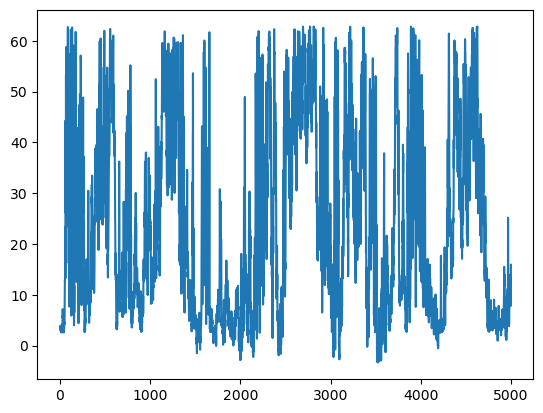

In [8]:
plt.plot(ener_corr[50])

In [9]:
def get_autocorrelation_function(signal : np.ndarray, norm : bool = True, mean : bool = True) -> np.ndarray:
    """
    Computes the autocorrelation function of a signal.

    Parameters
    ----------
    signal : np.ndarray
        Statistical signal to be autocorrelated.

    norm : bool
        Whether to compute normalized or unnormalized autocorrelation function.
        Default True.

    mean : np.ndarray
        Whether to subtract the mean from the signal.
        Default True.

    Returns
    -------
    autocorrelation_function : np.ndarray
        Autocorrelation function of the signal

    """

    #computing the lenght of the vectors
    M = len(signal)

    work_signal = signal.copy()
    if mean:
        work_signal -= np.mean(work_signal)

    #computing correlation
    autocorrelation_function = np.correlate(work_signal, work_signal, mode="full")[-M:]
    autocorrelation_function /= np.arange(M, 0, -1)

    #normalizing the autocorrelation function
    if norm:
        autocorrelation_function /= np.var(work_signal)
       
    return autocorrelation_function

In [ ]:
corr = np.zeros((10000,5000))
for i in range(ener_corr.shape[0]) :
	corr[i] = get_autocorrelation_function(ener_corr[i,:5000], norm=True, mean=False)

avg_corr = np.mean(corr, axis=0)

In [17]:
corr_no_mean = np.zeros(ener_corr.shape)
for i in range(1000) :
	corr_no_mean[i] = get_autocorrelation_function(ener_corr[i], norm=True, mean=False)

avg_corr_no_mean = np.mean(corr_no_mean, axis=0)

(4500.0, 5000.0)

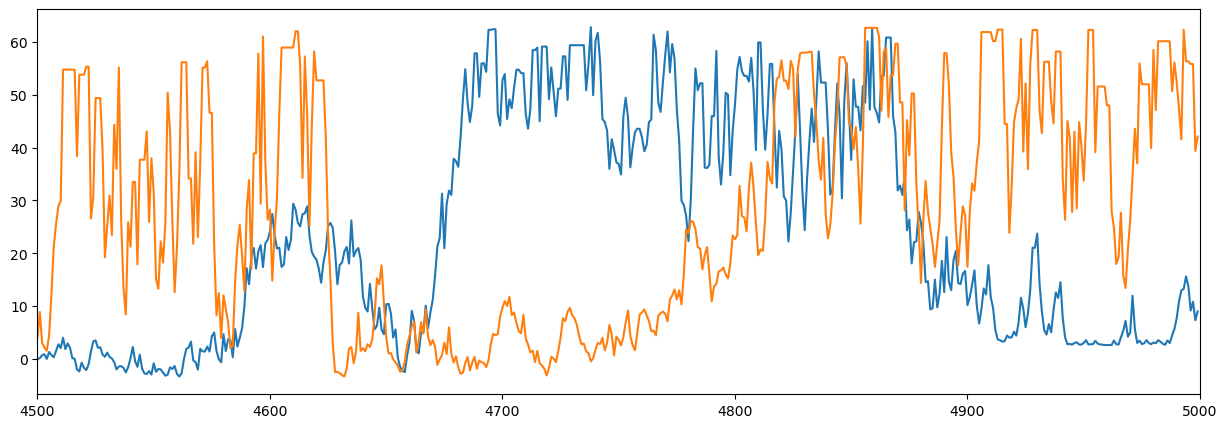

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(ener_corr[0])
plt.plot(ener_corr[100])
plt.xlim(4500,5000)

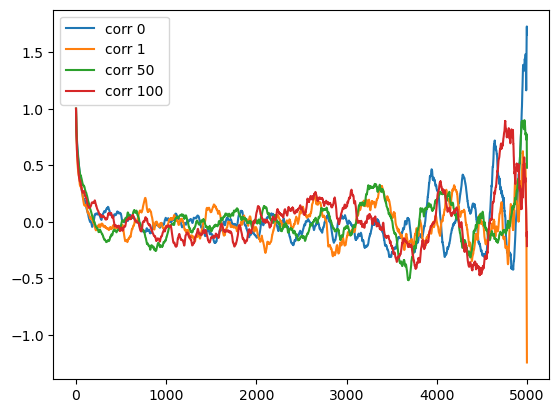

In [30]:
plt.plot(corr[0], label='corr 0')
plt.plot(corr[1], label='corr 1')

plt.plot(corr[50], label='corr 50')
plt.plot(corr[100], label='corr 100')

plt.legend()

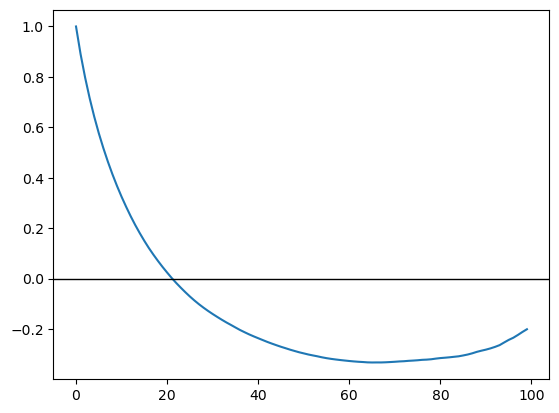

In [26]:
plt.plot(avg_corr)
plt.axhline(0, color='black', lw=1)